In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from NN_module.neural_network import NN
from NN_module.layers import Dense

## Regression
to test the regression capabilities of this neural network we will fit a NN into a sine plot

In [32]:
sin_x = np.array(np.linspace(0,6.28,10000,dtype=float),ndmin=2).T
sin_y = np.array(np.sin(cos_x),ndmin=2)

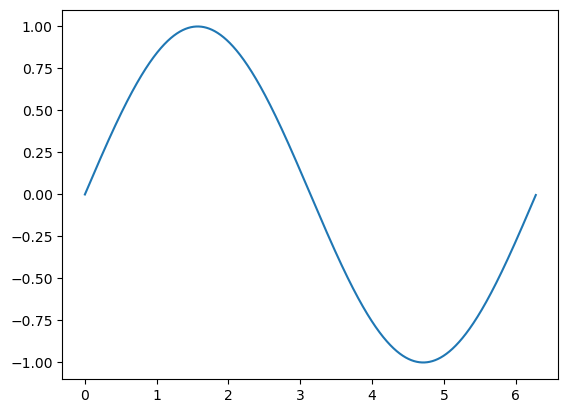

In [33]:
plt.plot(sin_x, sin_y)
plt.show()

In order to fit this data of cosine we will implement the neural network with the loss function of mse 'Mean squared error'.

In [34]:
model_cos_reg = NN([ Dense(units = 64 ,activation = 'relu'), 
                    Dense(units = 64, activation = 'relu'),
                    Dense(units = 1, activation = 'linear')],
                   loss = 'mse')

In [35]:
model_cos_reg.fit(cos_x,cos_y, epochs=10000, learning_rate=0.1, decay=0,momentum=0, get_log=True)

epoch: 0loss: 0.500

epoch: 1000loss: 0.159

epoch: 2000loss: 0.087

epoch: 3000loss: 0.053

epoch: 4000loss: 0.030

epoch: 5000loss: 0.015

epoch: 6000loss: 0.009

epoch: 7000loss: 0.007

epoch: 8000loss: 0.014

epoch: 9000loss: 0.005



In [38]:
cos_y_predict = model_cos_reg.predict(cos_x)
print(cos_y_predict[:10,])

[[0.09676031]
 [0.09704702]
 [0.09733372]
 [0.09762043]
 [0.09790713]
 [0.09819384]
 [0.09848054]
 [0.09876725]
 [0.09905396]
 [0.09934066]]


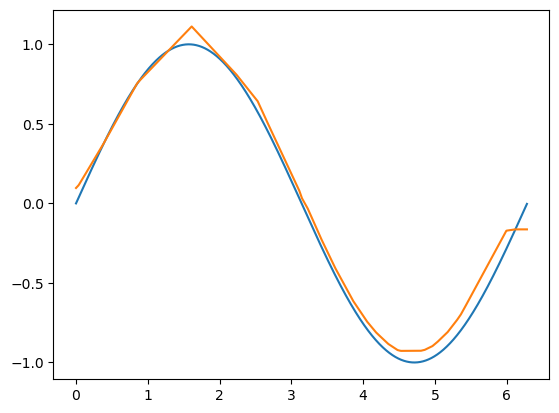

In [40]:
plt.plot(cos_x, cos_y)
plt.plot(cos_x, cos_y_predict)
plt.show()

The curve fits quite well , with a better optimizer(coming soon.....) and few hyperparameter tuning this wiould fit better

## Classification
we will be testing the nueral network for classification purposes.